### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

In [3]:
#1
function factorial2(n::Int)
    v = 1
    if n < 0
        return "Error: nonnegative argument expected."
    elseif n == 0
        return v
    elseif n > 0
        for i in 1:n
            v *= i
        end
        return v
    end
end
factorial2(10)

3628800

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

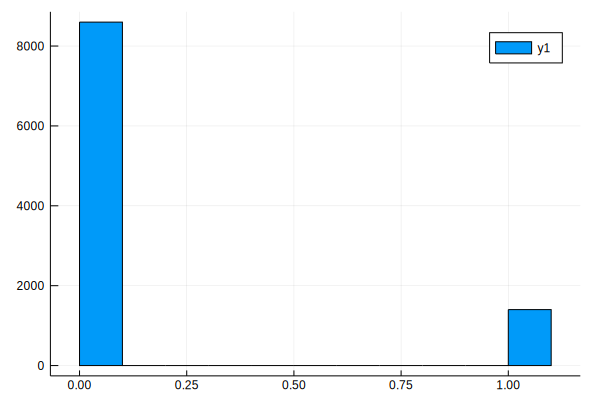

In [4]:
using Plots;
function binomial_rv(n,p)
    y = falses(n)
    for i in 1:n
        rand() < p ? y[i] = true : nothing
    end
    return y
end

draw = binomial_rv(10000,(1/7))
histogram(draw)

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

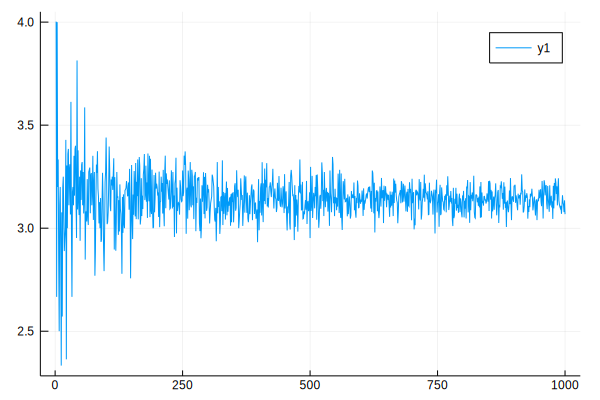

In [5]:
#3
function mcPi(n)
    a = 0.0
    for i in 1:n
        sqrt((rand())^2 + (rand())^2) < 1 ? a += (1/n) : nothing
    end
    return 4*a
end

mcPi(1000)
function iterMcPi(n)
    v = zeros(n)
    for i in 1:n
        v[i] = mcPi(i)
    end
    return v
end

using Plots
plot(iterMcPi(1000))

In [14]:
mcPi(10000000000)

3.1415861708769985

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

In [8]:
function coinFlips()
    incr = 0
    for i in 1:10
        if rand() > (1/2)
             incr += 1
        end
        if incr >= 3
            return "Pay 1 dollar."
            break
        end
        if i == 10
            return "Pay nothing."
        end
    end
end

coinFlips()

"Pay nothing."

In [12]:
coinFlips()

"Pay 1 dollar."

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

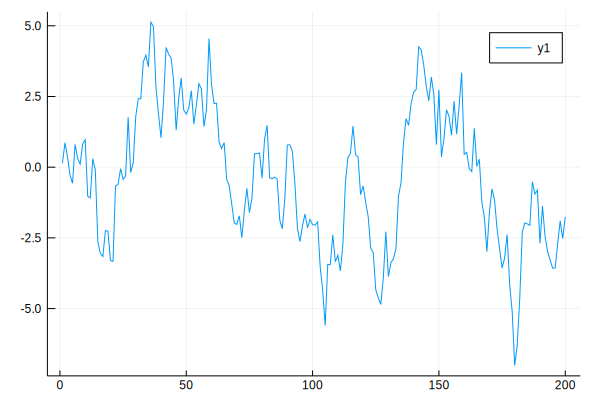

In [9]:
function simAR(n,α)
    x0 = 0
    X = zeros(n)
    for i in 1:n
        i == 1 ? X[i] = α*x0 + randn() : X[i] = α*X[i - 1] + randn()
    end
    return X
end
using Plots
n = 200
α = 0.9
plot(simAR(n,α))

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

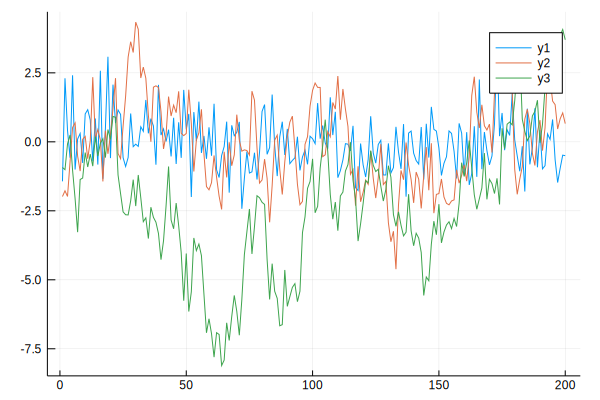

In [10]:
using Plots;
A = [0.0,0.8,0.98]
plot(simAR.(n,A))

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

In [19]:
function firstPass(tmax, σ, α, nbsim, a)
    T0 = zeros(nbsim)
    for i in 1:nbsim
        x = 1
        for j in 1:tmax
            if j == tmax
                x = 0
            else
                x *= α
                x += σ*randn()
            end
            if x <= a
                T0[i] = j
                break
            end
        end
    end
    return T0
end

firstPass(200,0.2,1.0,100,0)

100-element Array{Float64,1}:
  13.0
  74.0
 126.0
 200.0
 200.0
  57.0
 185.0
  21.0
  21.0
  47.0
 200.0
  46.0
 200.0
   ⋮  
 200.0
  16.0
 200.0
  38.0
  64.0
  17.0
 200.0
  16.0
 122.0
  79.0
  28.0
 200.0

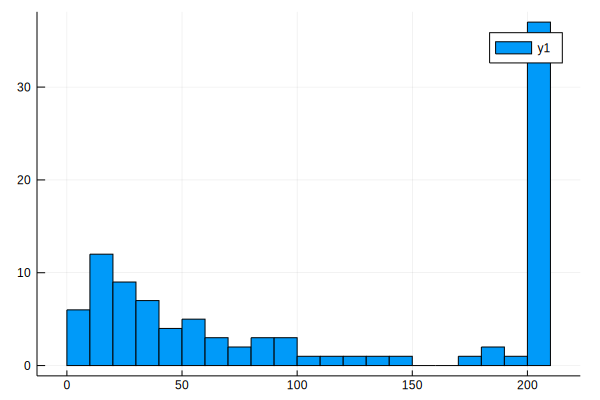

In [20]:
histogram(firstPass(200,0.2,1.0,100,0), bins = 30)

┌ Info: Recompiling stale cache file C:\Users\Dani\.julia\compiled\v1.1\Distributions\xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184


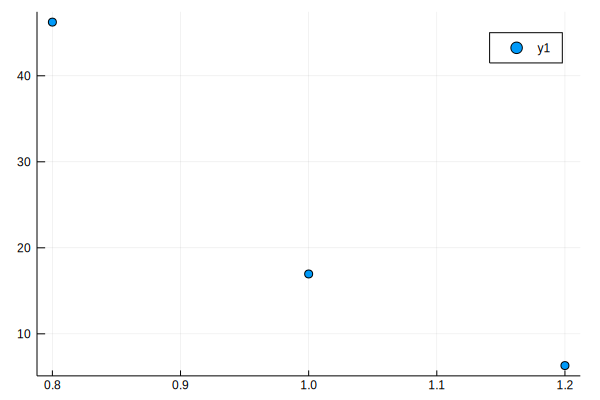

In [26]:
using Distributions;
Α = [0.8,1.0,1.2]
scatter(Α, mean.(firstPass.(200,0.2,1.0,100,Α)))

### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

In [15]:
using LinearAlgebra;
function newtonRMethod(f,f_prime; x_0, tolerance, maxiter)
    x_o = x_0
    iter = 0
    normdiff = 1
    g(x) = x - (f(x)/f_prime(x))
    while normdiff > tolerance && iter <= maxiter
        x_n = g(x_o)
        iter += 1
        normdiff = norm(x_n - x_o)
        x_o = x_n
    end
    return (x_o, normdiff, iter)
end

f_prime (generic function with 1 method)

In [16]:
#test 1
f(x) = (x - 1)^3
f_prime(x) = 3(x - 1)^2
newtonRMethod(f, f_prime; maxiter = 100, tolerance = 10^(-15), x_0 = 0.1)

(0.9999999999999986, 6.661338147750939e-16, 84)

In [18]:
#test 2
f(x) = (3x + 1)^(1/2) - 5
f_prime(x) =  (3/2)*(3x + 1)^(-1/2)
newtonRMethod(f, f_prime; maxiter = 100, tolerance = 10^(-15), x_0 = 0.1)

(8.0, 0.0, 7)

### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [66]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

(0.010000000000000002, 0.2)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  